## Matrix Multiplication Run Times

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
compiled_dir = f"..{os.sep}compiled"
plot_dir = f"..{os.sep}plots"

In [3]:
program_base_name = f"{compiled_dir}{os.sep}exercise_1"

In [4]:
opt_flags = ["O0", "O1", "O2", "O3", "Ofast"]
opt_flag_descriptors = [
    "Without optimization",
    "With O1 optimization",
    "With O2 optimization",
    "With O3 optimization",
    "With Ofast optimization"
]

In [5]:
mat_sizes = np.array([100, 250, 500, 750, 1000, 2000])

In [6]:
def get_run_time(mat_mul_method, flag, mat_dim):
    """Get the run time for the given matrix multiplication method,
        optimization flag, and matrix dimension.
    """
    run_params = [
        f"{program_base_name}_{flag}",
        "--mat_mul_method", mat_mul_method,
        "--num_rows", str(mat_dim),
        "--num_cols", str(mat_dim),
        "--num_inner_dim", str(mat_dim)
    ]

    output = subprocess.run(
        run_params, stdout=subprocess.PIPE, encoding='ascii'
    )

    lines = output.stdout.split('\n')

    return float(lines[4].split('=')[1])

In [7]:
def write_csv(filename, matrix_dims, run_times):
    """Write list of run times as a function of matrix dimension to a file."""
    w = csv.writer(open(filename, "w"))
    w.writerow(["matrix_dim,run_time"])
    w.writerows(list(zip(matrix_dims, run_times)))

### Get Run Times

In [8]:
run_times = {
    "matmul": np.zeros((len(opt_flags), len(mat_sizes))),
    "row-col": np.zeros((len(opt_flags), len(mat_sizes))),
    "col-row": np.zeros((len(opt_flags), len(mat_sizes)))
}

In [9]:
for mat_mul_method in run_times.keys():
    output_base_filename = f"..{os.sep}data{os.sep}{mat_mul_method}_runtimes"

    print(f"Running {mat_mul_method} ...")

    for i, flag in enumerate(opt_flags):
        # iterate over matrix sizes
        for j, mat_dim in enumerate(mat_sizes):
            run_times[mat_mul_method][i, j] = get_run_time(mat_mul_method, flag, mat_dim)

        # write file
        write_csv(f"{output_base_filename}_{flag}.csv", mat_sizes, run_times[mat_mul_method][i])

Running matmul ...
Running row-col ...
Running col-row ...


In [10]:
run_times["matmul"]

array([[1.45000e-04, 1.56800e-03, 1.18320e-02, 3.16220e-02, 5.00510e-02,
        3.98077e-01],
       [3.18000e-04, 1.40900e-03, 1.16110e-02, 3.11770e-02, 5.04650e-02,
        4.03912e-01],
       [1.47000e-04, 1.49300e-03, 9.54500e-03, 2.95390e-02, 5.12990e-02,
        4.11191e-01],
       [2.03000e-04, 1.63700e-03, 1.02060e-02, 2.93820e-02, 4.91380e-02,
        3.93222e-01],
       [8.20000e-05, 8.68000e-04, 6.25500e-03, 2.05690e-02, 4.91580e-02,
        4.01696e-01]])

In [11]:
run_times["row-col"]

array([[3.4600000e-03, 5.3796000e-02, 4.3599900e-01, 1.4860650e+00,
        3.5103880e+00, 2.8894926e+01],
       [4.5230000e-03, 5.6415000e-02, 4.4164800e-01, 1.5094170e+00,
        3.5799290e+00, 2.8657368e+01],
       [4.5260000e-03, 5.6400000e-02, 4.3753400e-01, 1.5161880e+00,
        3.5945490e+00, 2.8845120e+01],
       [3.5990000e-03, 5.4404000e-02, 4.3845400e-01, 1.4722670e+00,
        3.5509860e+00, 2.8620279e+01],
       [5.6510000e-03, 6.8920000e-02, 4.3915200e-01, 1.4995120e+00,
        3.5863110e+00, 2.8649604e+01]])

In [12]:
run_times["col-row"]

array([[2.4450000e-03, 3.9542000e-02, 3.1184000e-01, 1.0471090e+00,
        2.5155330e+00, 2.0263841e+01],
       [2.3540000e-03, 3.8291000e-02, 3.0826800e-01, 1.0417910e+00,
        2.4916280e+00, 2.0238539e+01],
       [2.3700000e-03, 3.8177000e-02, 3.0986800e-01, 1.0309560e+00,
        2.4675980e+00, 1.9807161e+01],
       [2.3970000e-03, 3.8098000e-02, 3.0630700e-01, 1.0302280e+00,
        2.4527340e+00, 1.9862482e+01],
       [2.3510000e-03, 3.8177000e-02, 3.0731500e-01, 1.0322990e+00,
        2.4649470e+00, 1.9855718e+01]])

### Perform Fit

In [13]:
fit_mat_sizes = np.linspace(mat_sizes[0], mat_sizes[-1], 100)

In [14]:
fit_params = {
    "matmul": np.zeros((len(opt_flags), 2)),
    "row-col": np.zeros((len(opt_flags), 2)),
    "col-row": np.zeros((len(opt_flags), 2))
}

In [15]:
fit_run_times = {
    "matmul": np.zeros((len(opt_flags), len(fit_mat_sizes))),
    "row-col": np.zeros((len(opt_flags), len(fit_mat_sizes))),
    "col-row": np.zeros((len(opt_flags), len(fit_mat_sizes)))
}

In [16]:
for mat_mul_method in run_times.keys():
    for i, flag in enumerate(opt_flags):
        p = np.polyfit(np.log(mat_sizes), np.log(run_times[mat_mul_method][i]), 1)
        fit_params[mat_mul_method][i] = p
        fit_run_times[mat_mul_method][i] = np.exp(p[0] * np.log(fit_mat_sizes) + p[1])

In [17]:
fit_params

{'matmul': array([[  2.62296909, -20.89766285],
        [  2.41167599, -19.46677868],
        [  2.63259976, -21.00134056],
        [  2.51025005, -20.17247418],
        [  2.83977028, -22.62455624]]),
 'row-col': array([[  3.01382745, -19.55527639],
        [  2.93100417, -18.97883397],
        [  2.93324566, -18.99181208],
        [  2.9993175 , -19.45651838],
        [  2.84018844, -18.34300233]]),
 'col-row': array([[  3.00832515, -19.8589775 ],
        [  3.02179769, -19.95936138],
        [  3.0131566 , -19.91085144],
        [  3.01010016, -19.89280752],
        [  3.0160946 , -19.93147374]])}

### Plot Results

In [18]:
plot_names = [f"{plot_dir}{os.sep}matmul_run_times_{opt}.pdf" for opt in opt_flags]

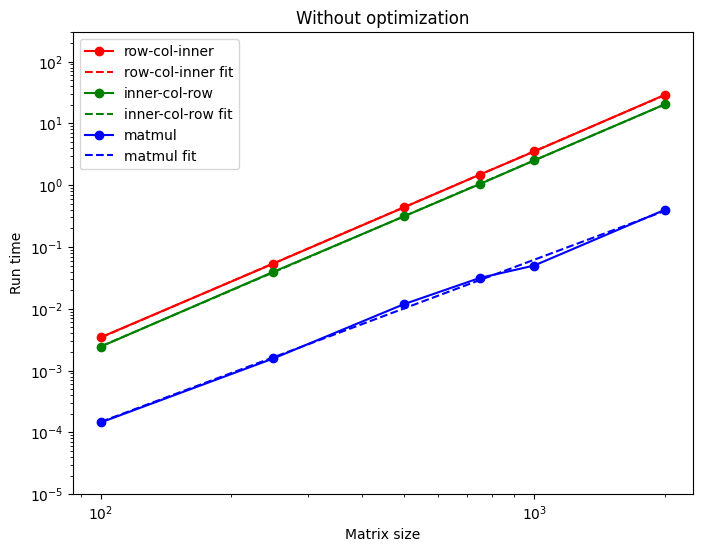

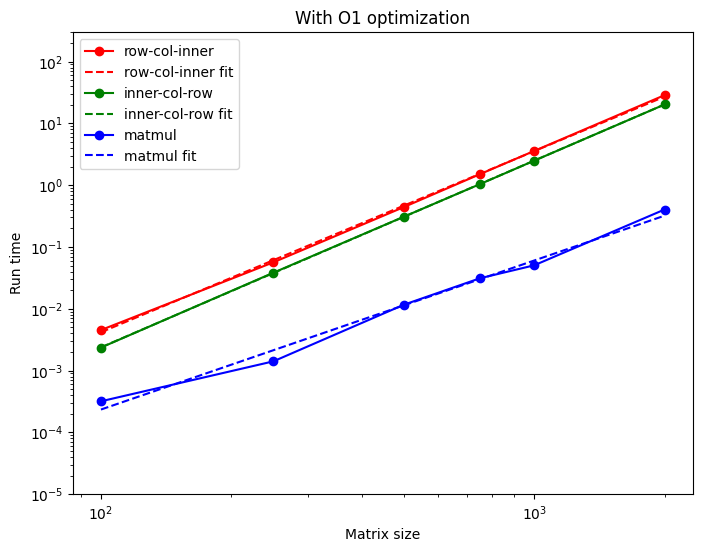

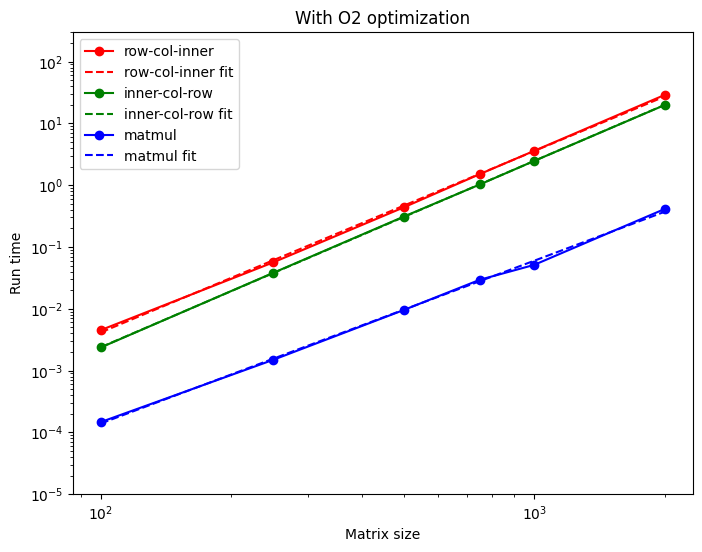

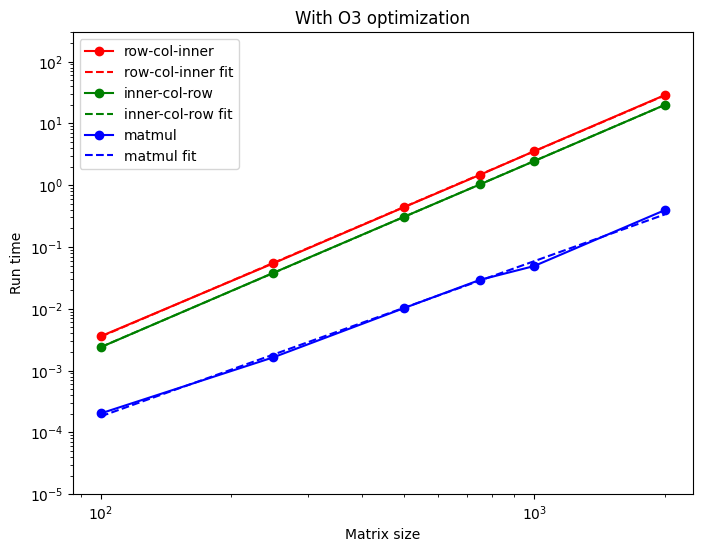

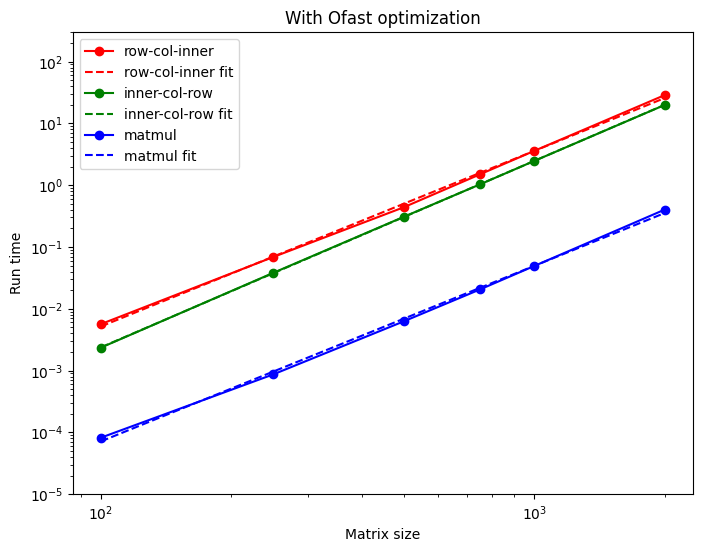

In [19]:
for i in range(len(opt_flags)):
    plt.figure(figsize=(8, 6))
    plt.loglog(mat_sizes, run_times["row-col"][i], 'o-', c='r', label='row-col-inner')
    plt.loglog(fit_mat_sizes, fit_run_times["row-col"][i],'--',  c='r', label='row-col-inner fit')
    
    plt.loglog(mat_sizes, run_times["col-row"][i], 'o-', c='g', label='inner-col-row')
    plt.loglog(fit_mat_sizes, fit_run_times["col-row"][i], '--', c='g', label='inner-col-row fit')
    
    plt.loglog(mat_sizes, run_times["matmul"][i], 'o-', c='b', label='matmul')
    plt.loglog(fit_mat_sizes, fit_run_times["matmul"][i], '--', c='b', label='matmul fit')
    
    plt.title(opt_flag_descriptors[i])
    plt.xlabel('Matrix size')
    plt.ylabel('Run time')
    plt.ylim([1e-5, 3e2])
    plt.legend(loc='upper left')
    plt.savefig(plot_names[i], format="pdf", bbox_inches="tight");